In [3]:
import SimpleITK as sitk

In [1]:
import cv2 as cv
import numpy as np
import imutils
import matplotlib.pyplot as plt
import SimpleITK as sitk
import dicom2nifti

In [4]:
print(cv.__version__)

4.7.0


## dcm转化为nii

In [21]:

dicom2nifti.convert_directory(r"YOUR_DATA_PATH\ciss3d_tra_iso_0005", r"YOUR_DATA_PATH", compression=True, reorient=True)


In [5]:
# Import the nii file
ciss_tra_hy = sitk.ReadImage(r"YOUR_DATA_PATH\5 ciss3d_tra_iso_1.nii.gz")

ciss_tra_sl = sitk.ReadImage(r"YOUR_DATA_PATH\5_ciss3d_tra_iso.nii.gz")


In [ ]:
t2tse_yx = sitk.ReadImage(r"YOUR_DATA_PATH\5_ciss3d_tra_iso.nii.gz")


In [5]:

reader = sitk.ImageSeriesReader()
dcm_dir = r'YOUR_DATA_PATH\MR t2_tse_tra_T11_T12_AVG6'
dcm_series = reader.GetGDCMSeriesFileNames(dcm_dir)
reader.SetFileNames(dcm_series)

image = reader.Execute()

t2tse_yx = sitk.GetArrayFromImage(image)
size = image.GetSize()
origin = image.GetOrigin()
spacing = image.GetSpacing()

print("Image size:", size[0], size[1], size[2])



Image size: 512 352 24


In [ ]:
ciss_tra.GetSize()

(320, 320, 64)

In [24]:
ciss_trasl.GetSize()

(320, 64, 320)

In [ ]:
# Check the size
ciss_tra.GetSize()[1:]

(320, 64)

In [9]:
# Turn image object to nd array
nda_tra_hy = sitk.GetArrayFromImage(ciss_tra_hy)
nda_tra_sl = sitk.GetArrayFromImage(ciss_tra_sl)

In [ ]:
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY) # 灰度化

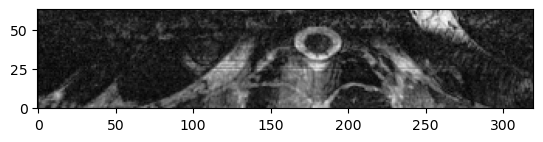

In [49]:
# Visualization
plt.imshow(nda_tra_sl[240,:,:],cmap='Greys_r',origin='lower')

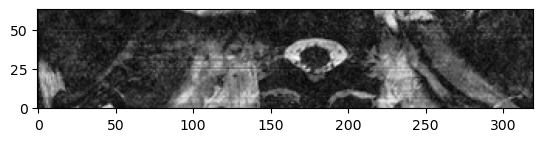

In [92]:
plt.imshow(nda_tra_sl[60,:,:],cmap='Greys_r',origin='lower')

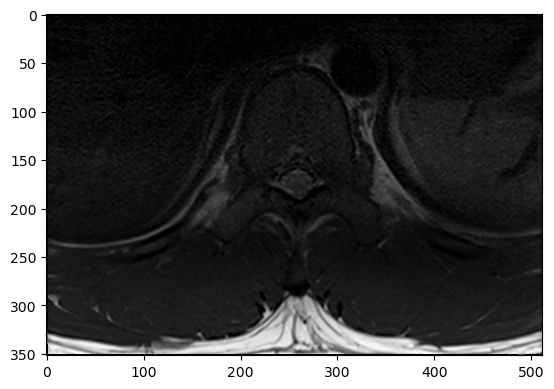

In [29]:
plt.imshow(t2tse_yx[15,:,:],cmap='Greys_r')

In [21]:
t2tse_yx.shape[1:]

(352, 512)

In [10]:
test= nda_tra_sl[58,:,:]


In [11]:
test

array([[  0,  81,  62, ...,  97, 110,  67],
       [  0,  98,  70, ..., 104, 139, 110],
       [  0,  55, 100, ..., 117, 132, 131],
       ...,
       [  0,  87,  72, ...,  93,  90,  48],
       [  0,  52,  59, ...,  93,  95,  53],
       [  0,  64,  85, ...,  54,  77,  54]], dtype=uint16)

uint16到uint8的转换：
uint8保存的数据，是0-255.
uint16 保存的数据，是0-65535.

当我用上述语句转换矩阵时，矩阵中大于255的数据，都被转换到0-255内。数据会损失，所以要用标准化的方式处理

In [81]:
np.max(nda_tra)

1965

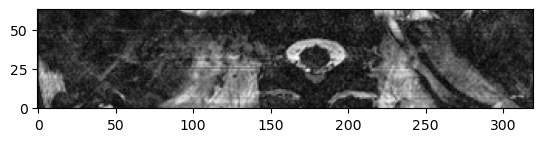

In [12]:
test4 = cv.normalize(test,None,0,255,cv.NORM_MINMAX).astype(np.uint8)
# Visualization
plt.imshow(test4,cmap='Greys_r',origin='lower')

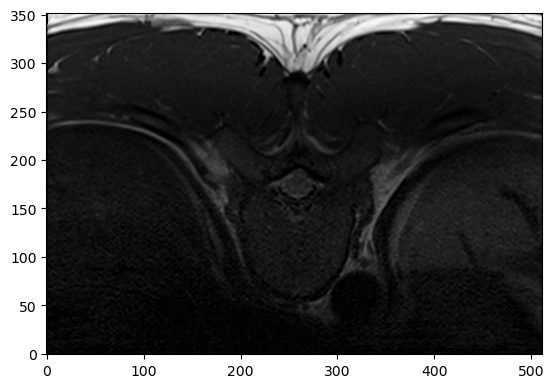

In [33]:
testyx = cv.normalize(t2tse_yx[15,:,:],None,0,255,cv.NORM_MINMAX).astype(np.uint8)
# Visualization
plt.imshow(testyx,cmap='Greys_r',origin='lower')


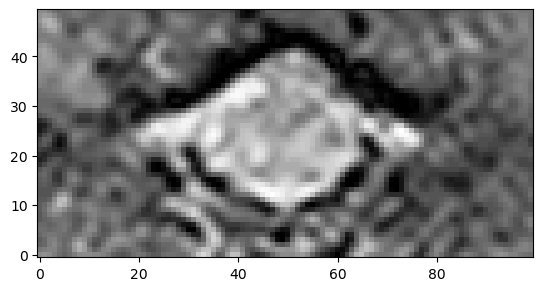

In [50]:
plt.imshow(testyx[150:200,210:310],cmap='Greys_r',origin='lower')

In [43]:
np.max(testyx)

255

## ROI选取（裁剪）

### 手动裁剪

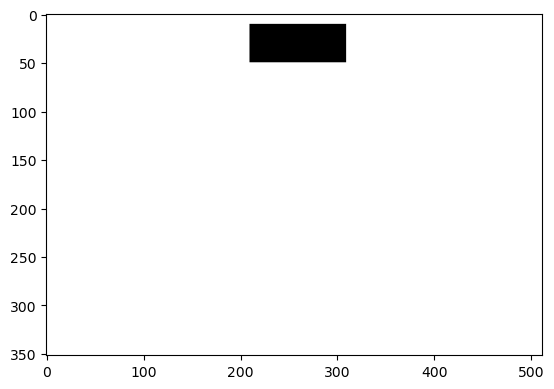

In [20]:
ROI = np.zeros(ciss_tra_sl.GetSize()[1:], np.uint8)# 创建与原图同尺寸的空numpy数组，用来保存ROI信息
# mask设置剪裁中间区域
ROI[10:50,210:310] = 255
plt.imshow(ROI,cmap='Greys')

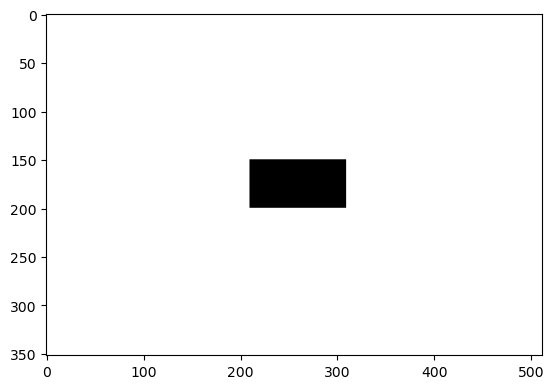

In [38]:
ROI = np.zeros(t2tse_yx.shape[1:], np.uint8)# 创建与原图同尺寸的空numpy数组，用来保存ROI信息
# mask设置剪裁中间区域
ROI[150:200,210:310] = 255
plt.imshow(ROI,cmap='Greys')

In [163]:
ROI.shape

(64, 320)

In [37]:
ROI

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

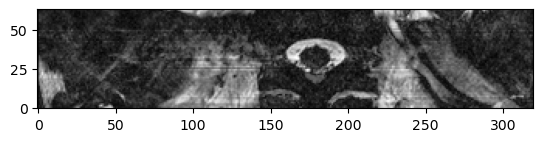

In [165]:
plt.imshow(test,cmap='Greys_r',origin='lower')

In [ ]:
mask_test = cv.bitwise_and(test4, nda_tra[:,220,:], mask=mask.T)
mask_img221 = cv.bitwise_and(nda_tra[:,221,:], nda_tra[:,221,:], mask=mask.T)

##### 裁剪

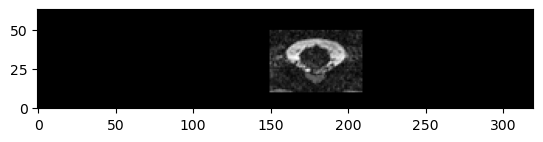

In [216]:
mask_test =ROI & test4
plt.imshow(mask_test,cmap='Greys_r',origin='lower')

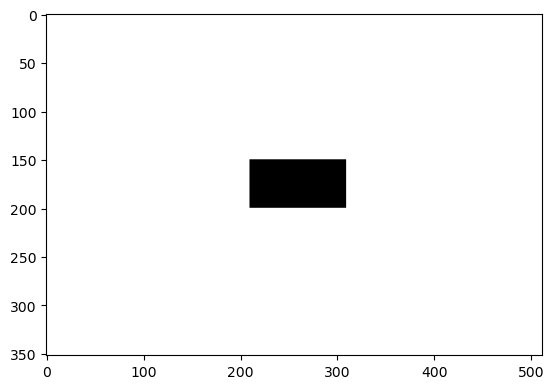

In [45]:
plt.imshow(ROI,cmap='Greys')

In [ ]:
testyx

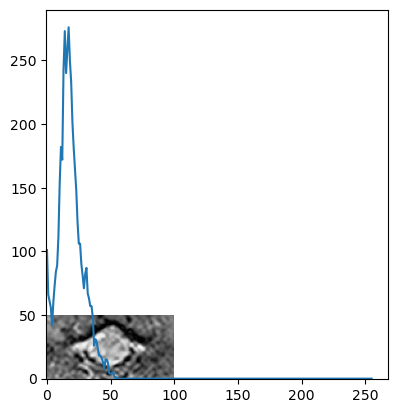

In [48]:
testroi = testyx[150:200,210:310]
plt.imshow(testroi,cmap='Greys_r',origin='lower')

hist = cv.calcHist([testroi], [0], None, [256], [0, 256]) 
plt.plot(hist)

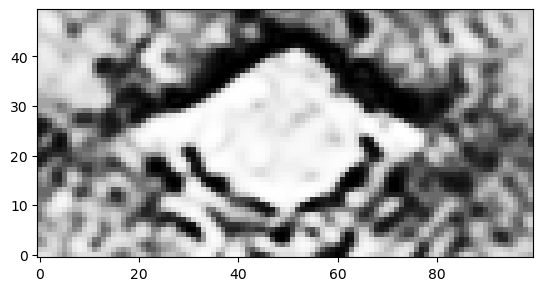

In [52]:
testeq = cv.equalizeHist(testroi, dst=None)
plt.imshow(testeq,cmap='Greys_r',origin='lower')

In [ ]:
mask_test = cv.bitwise_and(test4, nda_tra[:,220,:], mask)
plt.imshow(mask_test,cmap='Greys_r')

In [ ]:
from collections import Counter
print(Counter(nda_tra[:,300,:].flatten()))

In [6]:
# 同等大小mask
mask = np.zeros(ciss_tra.GetSize()[1:], np.uint8)

In [54]:
mask.shape

(320, 64)

In [7]:

mask[0:100, 250:] = 255      # 裁剪出mask区域
mask_hist = cv.calcHist([nda_tra[:,300,:]], [0], mask.T, [256], [0, 256])


In [83]:
nda_tra[:,300,:].shape

(64, 320)

In [82]:
mask.shape

(320, 64)

In [77]:
# mask = np.zeros(ciss_tra.GetSize()[1:], np.uint8)
# mask[0:100,:] = 255
# mask[250:,:] = 255  

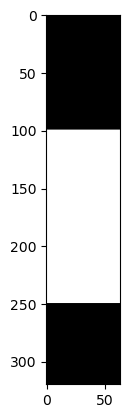

In [79]:
plt.imshow(mask,cmap='Greys')

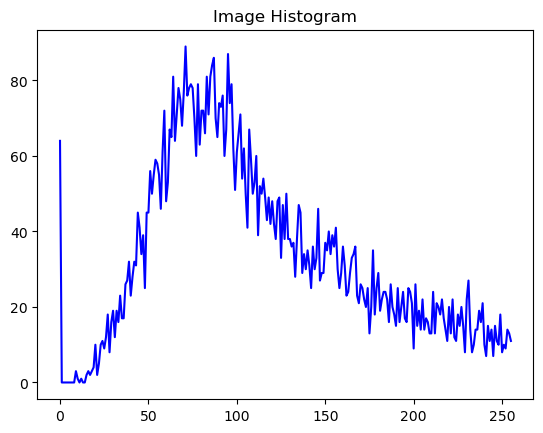

In [87]:
# plot the above computed histogram
plt.plot(mask_hist, color='b')
plt.title('Image Histogram')
plt.show()

In [107]:
# 用mask裁剪
mask_img220 = cv.bitwise_and(nda_tra[:,220,:], nda_tra[:,220,:], mask=mask.T)
mask_img221 = cv.bitwise_and(nda_tra[:,221,:], nda_tra[:,221,:], mask=mask.T)

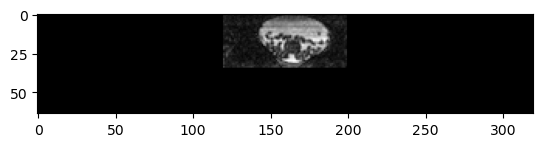

In [10]:
plt.imshow(mask_img220,cmap='Greys_r')

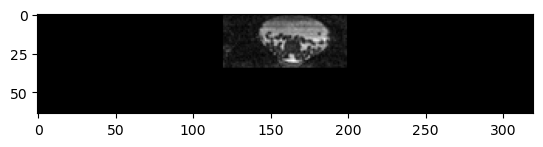

In [32]:
plt.imshow(mask_img221,cmap='gray')


In [47]:
blurred220 = cv.GaussianBlur(mask_img220, (3, 3), 0)
blurred221 = cv.GaussianBlur(mask_img221, (3, 3), 0)

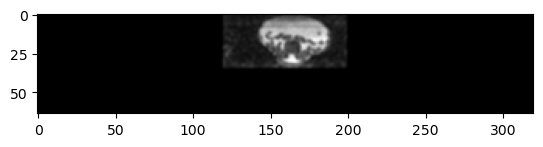

In [48]:
plt.imshow(blurred220,cmap = 'Greys_r')

In [60]:
# # (2).高斯滤波
# blurred = cv.GaussianBlur(gray, (5, 5), 0)
# thresh = cv.threshold(blurred, 64, 80, cv.THRESH_BINARY)[1]
mask_img220 = mask_img220.astype(np.uint8)
filter220 = cv.bilateralFilter(src=mask_img220, d=0, sigmaColor=10, sigmaSpace=5)


In [82]:
blurred = cv.GaussianBlur(thresh, (3, 3), 0)

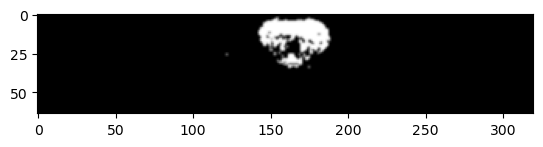

In [83]:
plt.imshow(blurred,cmap = 'Greys_r')  

In [37]:
from collections import Counter
mask_img220
print(Counter(thresh.flatten()))

Counter({0: 20022, 400: 458})


In [40]:
print(f'image value range: [{mask_img220.min()}, {mask_img220.max()}]')

image value range: [0, 1061]


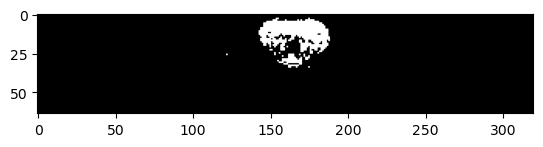

In [109]:
# # 调整数据格式
# thresh.dtype
# thresh = thresh.astype(np.uint8)
# (3).二值化图像(化为0,1)
thresh = cv.threshold(mask_img220, 300, 1000, cv.THRESH_BINARY)[1]     # 调整高/低阈值，以匹配最好的识别效果
plt.imshow(thresh,cmap = 'Greys_r')     # thresh——二值化，具体将闭合轮廓整体填充为灰色，其余(背景)为黑色

In [95]:
thresh.dtype
thresh = thresh.astype(np.uint8)
cnts,_ = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)     # RETR_EXTERNAL
#cnts = imutils.grab_contours(cnts)

In [117]:
img220copy = nda_tra[:,220,:].copy()
cv.drawContours(img220copy, cnts, -1, (0,0,255), 2)

array([[  0,  78, 140, ..., 305, 293, 222],
       [  0, 122, 152, ..., 268, 293, 217],
       [  0, 173, 186, ..., 177, 317, 349],
       ...,
       [  0, 390, 396, ..., 207, 107, 171],
       [  0, 288, 255, ..., 214, 227, 252],
       [  0, 257, 215, ..., 288, 212, 209]], dtype=uint16)

### 自适应ROI选取

In [ ]:
import cv2 as cv
import numpy as np


src = cv.imread(r"D:\test5.jpg") # 读取图片
ROI = np.zeros(src.shape, np.uint8) # 创建与原图同尺寸的空numpy数组，用来保存ROI信息

gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY) # 灰度化
ret, binary = cv.threshold(gray,
			   0, 255, 
			   cv.THRESH_BINARY_INV | cv.THRESH_TRIANGLE) # 自适应二值化
			   
out_binary, contours, hierarchy = cv.findContours(binary, 
			   cv.RETR_EXTERNAL,
			   cv.CHAIN_APPROX_SIMPLE) # 查找所有轮廓，每个轮廓信息保存于contours数组中

for cnt in range(len(contours)): # 基于轮廓数量处理每个轮廓
    # 轮廓逼近，具体原理还需要深入研究
    epsilon = 0.01 * cv.arcLength(contours[cnt], True)
    approx = cv.approxPolyDP(contours[cnt], epsilon, True) # 保存逼近结果的顶点信息
    							   # 顶点个数决定轮廓形状 
    # 计算轮廓中心位置							   
    mm = cv.moments(contours[cnt])
    if mm['m00'] != 0:
        cx = int(mm['m10'] / mm['m00'])
        cy = int(mm['m01'] / mm['m00'])
        color = src[cy][cx]
        color_str = "(" + str(color[0]) + ", " + str(color[1]) + ", " + str(color[2]) + ")"
        p = cv.arcLength(contours[cnt], True)
        area = cv.contourArea(contours[cnt])
        
        # 分析几何形状
        corners = len(approx)
        if corners == 3 and (color[2]>=150 or color[0]>=150) and area>1000:  # 一系列判定条件是由该项目的特点所调整的
            cv.drawContours(ROI, contours, cnt, (255, 255, 255), -1)  # 在ROI空画布上画出轮廓，并填充白色（最后的参数为轮廓线条宽度，如果为负数则直接填充区域）
            imgroi = ROI & src  # ROI和原图进行与运算，筛出原图中的ROI区域
            cv.imshow("ROI", imgroi)
            cv.imwrite(r"D:\ROI.jpg")
            
        if corners >= 10 and (color[2]>=150 or color[0]>=150) and area>1000:          
    	    cv.drawContours(ROI, contours, cnt, (255, 255, 255), -1)
            imgroi = ROI & src
            cv.imshow("ROI",imgroi）
            cv.imwrite(r"D:\ROI.jpg")

            
cv.waitKey(0)
cv.destroyAllWindows()         



In [ ]:
ROI = np.zeros(ciss_trasl.GetSize()[1:], np.uint8)# 创建与原图同尺寸的空numpy数组，用来保存ROI信息

In [60]:
gray = cv.cvtColor(test, cv.COLOR_BGR2GRAY) # 灰度化

error: OpenCV(4.7.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x981fb336::Set<1,-1,-1>,struct cv::impl::A0x981fb336::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


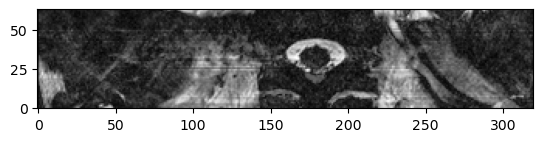

In [112]:
# Visualization
plt.imshow(nda_tra_sl[58,:,:],cmap='Greys_r',origin='lower')

读取进来的图片要先做格式转换

In [78]:
ret, binary = cv.threshold(test ,0, 255, cv.THRESH_BINARY_INV | cv.THRESH_TRIANGLE) # 自适应二值化
out_binary, contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE) # 查找所有轮廓，每个轮廓信息保存于contours数组中


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1561: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::threshold'


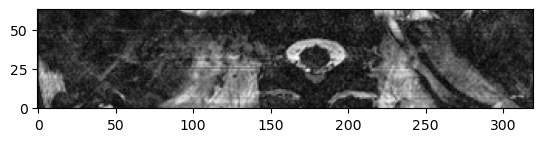

In [203]:
# Visualization
plt.imshow(test5,cmap='Greys_r',origin='lower')

In [196]:
ret, binary = cv.threshold(test5 ,250, 845, cv.THRESH_BINARY_INV | cv.THRESH_TRIANGLE) # 自适应二值化

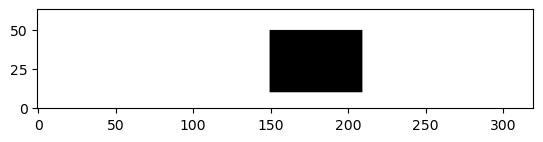

In [232]:
ret, binary = cv.threshold(mask_test ,0, 20, cv.THRESH_BINARY_INV | cv.THRESH_TRIANGLE) # 自适应二值化
# Visualization
plt.imshow(binary,cmap='Greys_r',origin='lower')


##### 简单+大津二值化

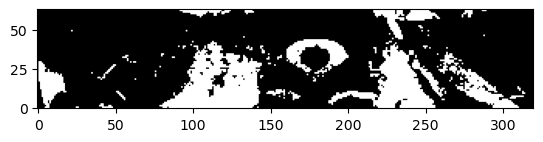

In [230]:
ret, binary = cv.threshold(test5 ,10, 255,cv.THRESH_BINARY+cv.THRESH_OTSU) # 简单+大津二值化
# Visualization
plt.imshow(binary,cmap='Greys_r',origin='lower')



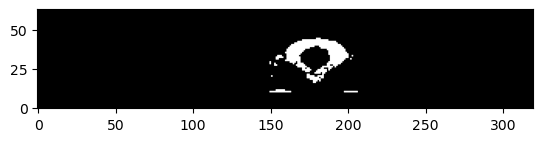

In [237]:
ret, binary = cv.threshold(mask_test ,0, 255,cv.THRESH_BINARY+cv.THRESH_OTSU) # 简单+大津二值化
# Visualization
plt.imshow(binary,cmap='Greys_r',origin='lower')

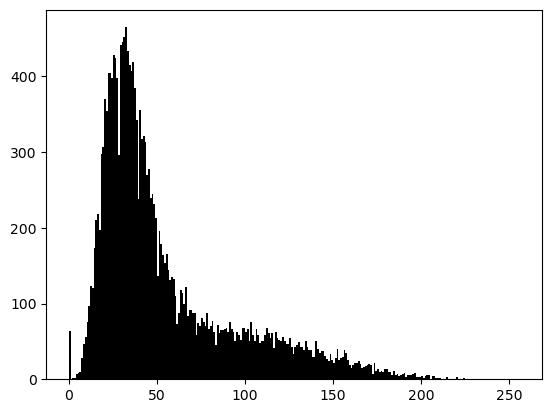

In [204]:
plt.hist(test5.ravel(), 256, [0, 256],color="black")  # image.ravel()#ravel函数功能是将多维数组降为一维数组,统计各个bin的频次，256：bin的个数，[0, 256]：范围
plt.show()  # 和OpenCV中的想要的直方图不同

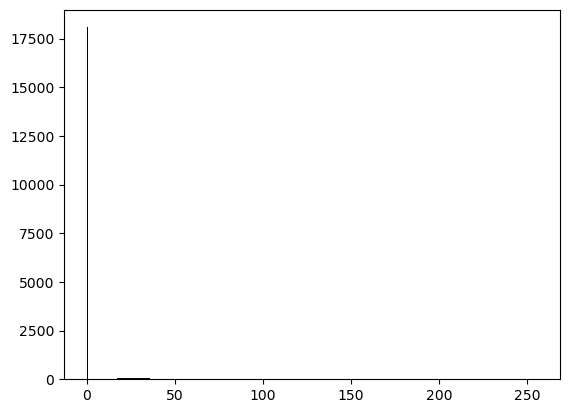

In [225]:
plt.hist(mask_test.ravel(), 256, [0, 256],color="black")  # image.ravel()#ravel函数功能是将多维数组降为一维数组,统计各个bin的频次，256：bin的个数，[0, 256]：范围
plt.show()  # 和OpenCV中的想要的直方图不同

##### 大津二值化

In [150]:
ret, binary = cv.threshold(test1 ,500, 845,cv.THRESH_OTSU)

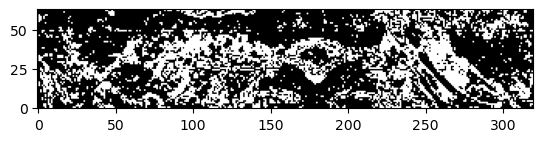

In [151]:
# Visualization
plt.imshow(binary,cmap='Greys_r',origin='lower')

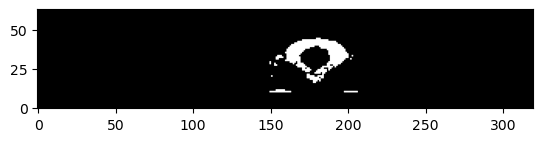

In [236]:
ret, binary = cv.threshold(mask_test ,0, 255,cv.THRESH_OTSU)
# Visualization
plt.imshow(binary,cmap='Greys_r',origin='lower')

##### 自适应阈值
效果不太行，需要剪切后再尝试

In [200]:
th2 = cv.adaptiveThreshold(test5, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 3, 2)
th3 = cv.adaptiveThreshold(test5, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 3, 2)


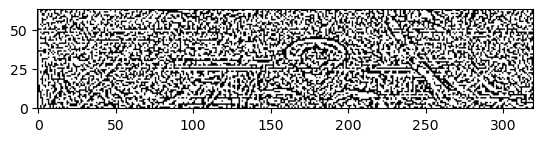

In [201]:
# Visualization
plt.imshow(th2,cmap='Greys_r',origin='lower')

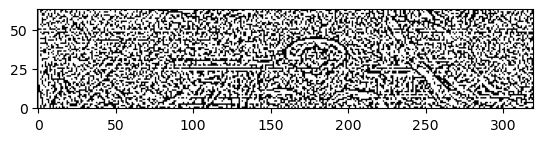

In [202]:
# Visualization
plt.imshow(th3,cmap='Greys_r',origin='lower')

In [43]:
ROI.shape

(64, 320)

In [55]:
gray_sl = []
for i in range(0,nda_tra_sl.shape[0]):
    gray_sl.append(cv.cvtColor(nda_tra_sl[i,:,:], cv.COLOR_BGR2GRAY)) # 灰度化
    

error: OpenCV(4.7.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x981fb336::Set<1,-1,-1>,struct cv::impl::A0x981fb336::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY) # 灰度化
ret, binary = cv.threshold(gray,
			   0, 255, 
			   cv.THRESH_BINARY_INV | cv.THRESH_TRIANGLE) # 自适应二值化
			   
out_binary, contours, hierarchy = cv.findContours(binary, 
			   cv.RETR_EXTERNAL,
			   cv.CHAIN_APPROX_SIMPLE) # 查找所有轮廓，每个轮廓信息保存于contours数组中

In [ ]:
gray220 = cv.cvtColor(mask_img220, cv.COLOR_BGR2GRAY)

In [109]:
test1

array([[  0,  81,  62, ...,  97, 110,  67],
       [  0,  98,  70, ..., 104, 139, 110],
       [  0,  55, 100, ..., 117, 132, 131],
       ...,
       [  0,  87,  72, ...,  93,  90,  48],
       [  0,  52,  59, ...,  93,  95,  53],
       [  0,  64,  85, ...,  54,  77,  54]], dtype=uint8)

In [110]:
test

array([[  0,  81,  62, ...,  97, 110,  67],
       [  0,  98,  70, ..., 104, 139, 110],
       [  0,  55, 100, ..., 117, 132, 131],
       ...,
       [  0,  87,  72, ...,  93,  90,  48],
       [  0,  52,  59, ...,  93,  95,  53],
       [  0,  64,  85, ...,  54,  77,  54]], dtype=uint16)

In [ ]:
# 绘制灰度直方图
def plot_demo(image):
    """
    画灰度图直方图:
    绘图都可以调用matplotlib.pyplot库来进行，其中的hist函数可以直接绘制直方图。
    plt.hist(arr, bins=50, normed=1, facecolor='green', alpha=0.75)
    hist的参数非常多，但常用的就这五个，只有第一个是必须的，后面四个可选
    arr: 需要计算直方图的一维数组
    bins: 直方图的柱数，可选项，默认为10
    normed: 是否将得到的直方图向量归一化。默认为0
    range参数表示箱子的下限和上限。即横坐标显示的范围，范围之外的将被舍弃
    """
    plt.hist(image.ravel(), 256, [0, 256],color="black")  # image.ravel()#ravel函数功能是将多维数组降为一维数组,统计各个bin的频次，256：bin的个数，[0, 256]：范围
    plt.show()  # 和OpenCV中的想要的直方图不同


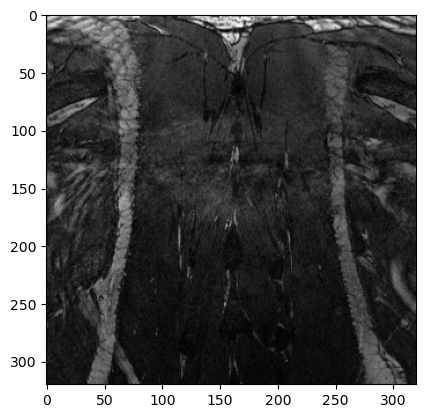

In [18]:
# Visualization
plt.imshow(nda_tra[50,:,:],cmap='Greys_r')

In [118]:
cv.imshow('edge',img220copy) 
cv.waitKey(0)
cv.destroyAllWindows()

### 超分处理

#### bilinear, bicubic

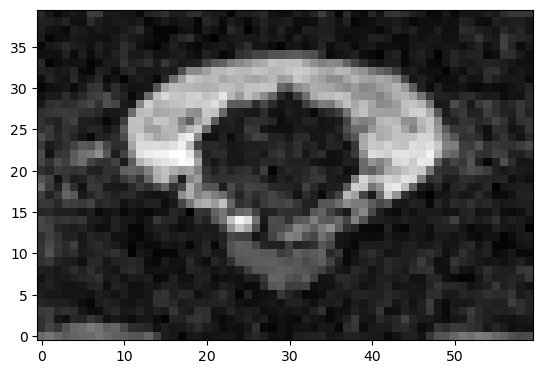

In [15]:
cropped = test4[10:50,150:210]
# Visualization
plt.imshow(cropped,cmap='Greys_r',origin = 'lower')

In [ ]:
# Visualization
plt.imshow(nda_tra[50,:,:],cmap='Greys_r')

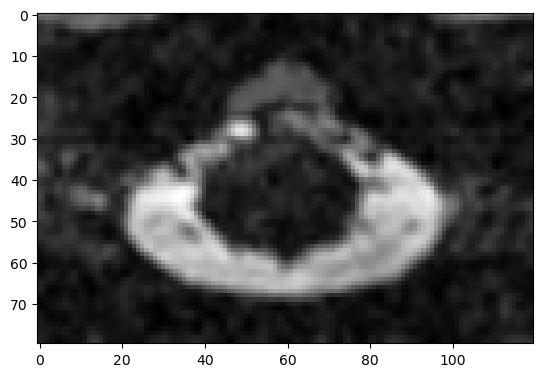

In [60]:
img_newcl2x = cv.resize(cropped, None, fx=2, fy=2, interpolation=cv.INTER_LINEAR)
plt.imshow(img_newcl2x,cmap='Greys_r')

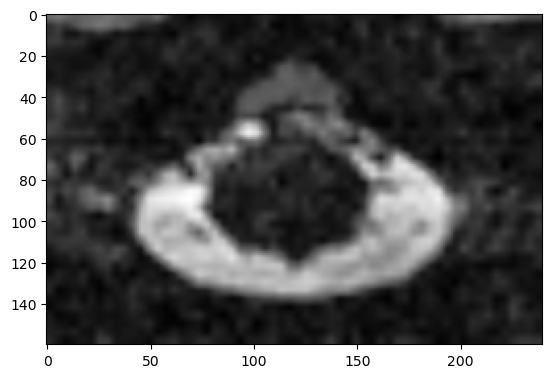

In [58]:
img_newcl4x = cv.resize(cropped, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)
plt.imshow(img_newcl4x,cmap='Greys_r')

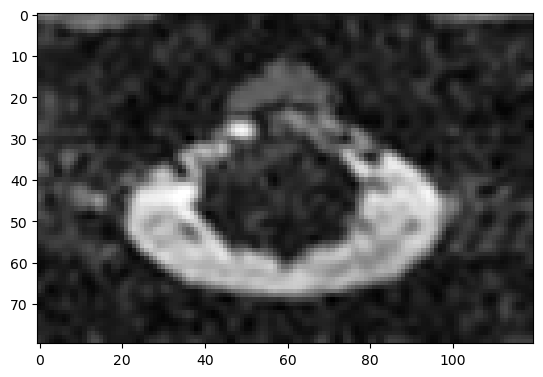

In [248]:
img_newbc= cv.resize(cropped, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
plt.imshow(img_newbc,cmap='Greys_r')

In [25]:
img2 = np.zeros_like(cropped)

In [35]:
cropped.shape

(40, 60)

In [33]:
img2

array([[ 90, 100,  86, ...,  66,  61,  62],
       [ 43,  58,  47, ...,  16,  21,  19],
       [ 44,  52,  23, ...,  20,  25,  27],
       ...,
       [ 31,  20,  18, ...,  28,  36,  23],
       [ 31,  31,  26, ...,  30,  31,  23],
       [ 38,  23,  12, ...,  49,  48,  47]], dtype=uint8)

In [38]:
img2 = np.expand_dims(cropped,axis=2)

In [40]:
img2.shape

(40, 60, 1)

##### edsr需要三通道图片，需要单通道复制为三通道

In [41]:
img2 = np.expand_dims(cropped,axis=-1)
img2 = np.concatenate((img2, img2, img2), axis=-1)
# img2[:,:,0] = cropped
# img2[:,:,1] = cropped
# img2[:,:,2] = cropped
print(img2.shape)

(40, 60, 3)


#### EDSR

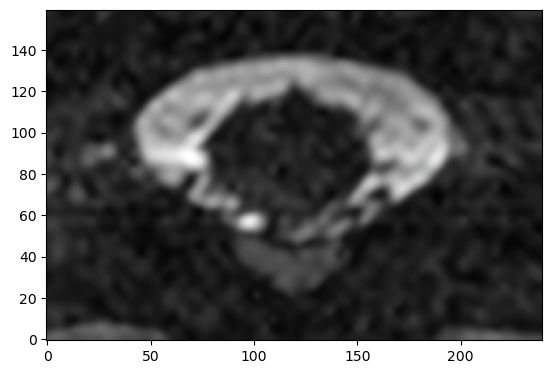

In [54]:
# 创建模型
sr = dnn_superres.DnnSuperResImpl_create()   
# 读取模型
path = r"C:\Users\EugeneZHOU\Downloads\EDSR_Tensorflow-master\EDSR_Tensorflow-master\models\EDSR_x4.pb"
sr.readModel(path)
#  设定算法和放大比例
algorithm = "edsr"
sr.setModel(algorithm, 4)
# 放大图像
img_newedsr = sr.upsample(img2)
plt.imshow(img_newedsr,cmap='Greys_r', origin = 'lower')

In [44]:
img_newedsr.shape

(160, 240, 3)

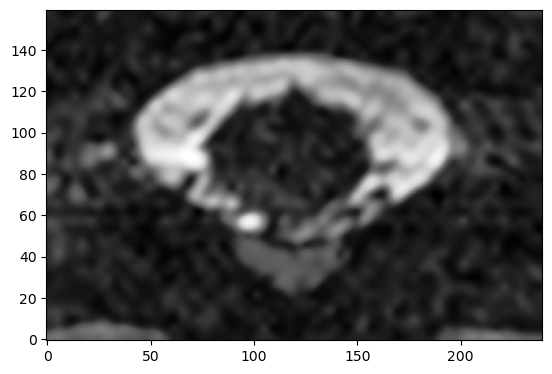

In [55]:
plt.imshow(img_newedsr[:,:,0],cmap='Greys_r', origin = 'lower')

In [98]:
img2.shape

(40, 60, 3)

In [119]:
img_newedsr.shape

(160, 240, 3)

In [110]:
img_newedsr[:,:,0].shape

(160, 240)

In [111]:
data = img_newedsr[:,:,0].reshape((-1,1))
data = np.float32(data)
data.shape

(38400, 1)

In [107]:
data = np.float32(img_newedsr)
data.shape

(160, 240, 3)

In [108]:
data

array([[[89., 90., 89.],
        [91., 91., 90.],
        [91., 92., 91.],
        ...,
        [74., 75., 76.],
        [73., 74., 75.],
        [72., 72., 73.]],

       [[87., 86., 87.],
        [89., 89., 89.],
        [92., 92., 91.],
        ...,
        [67., 67., 68.],
        [67., 67., 68.],
        [66., 66., 67.]],

       [[81., 81., 81.],
        [84., 84., 84.],
        [88., 88., 88.],
        ...,
        [56., 56., 56.],
        [56., 55., 56.],
        [55., 54., 55.]],

       ...,

       [[36., 37., 37.],
        [37., 38., 38.],
        [37., 37., 37.],
        ...,
        [45., 44., 44.],
        [44., 44., 44.],
        [44., 43., 43.]],

       [[36., 37., 38.],
        [37., 38., 38.],
        [37., 37., 37.],
        ...,
        [48., 48., 48.],
        [47., 48., 48.],
        [46., 46., 46.]],

       [[36., 37., 37.],
        [36., 37., 37.],
        [35., 36., 36.],
        ...,
        [50., 51., 50.],
        [49., 49., 49.],
        [47., 48., 48.]]

(38400, 3)


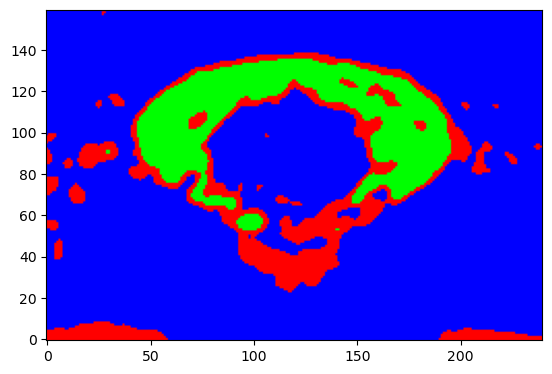

In [125]:


# # 构建图像数据
# data = image.reshape((-1,3))
# data = np.float32(data)

# MAX_ITER最大迭代次数，EPS最高精度
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
num_clusters = 3
ret,label,center=cv.kmeans(data, num_clusters, None, criteria, num_clusters, cv.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)

# 颜色label
color = np.uint8([[255, 0, 0],
                  [0, 0, 255],[0, 255, 0]])

# [128, 128, 128]

res = color[label.flatten()]
print(res.shape)
# 显示
result = res.reshape(img_newedsr.shape)

# cv.imshow('kmeans-image-demo',result)
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.imshow(result, origin = 'lower')

In [114]:
label.shape

(38400, 1)

In [115]:
label.flatten()

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [116]:
color[label.flatten()]

array([[  0, 255,   0],
       [  0, 255,   0],
       [  0, 255,   0],
       ...,
       [255,   0,   0],
       [255,   0,   0],
       [255,   0,   0]], dtype=uint8)

In [ ]:
reshaped_image = img_newedsr[:,:,0].reshape(-1, 1)

In [ ]:
n_colors = (2,3,4,5,6)
for n_cluster in n_colors:
    ret,label,center=cv.kmeans(data, num_clusters, None, criteria, num_clusters, cv.KMEANS_RANDOM_CENTERS)
    
    
    
    
    
    
    
    
    
    
    
    
    kmeans_mip = KMeans(n_clusters=n_cluster,random_state=50).fit(X_mip)
    segmented_img_mip = kmeans_mip.cluster_centers_[kmeans_mip.labels_]
    segmented_imgs_mip.append(segmented_img_mip.reshape(data_mip.shape))
    new_data_mip = segmented_img_mip.reshape(data_mip.shape)
# 可视化展示
plt.figure(1,figsize=(12,8))
plt.subplot(231)
plt.imshow(data_mip.astype('uint8'))
plt.title('Original image')
for idx,n_clusters in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs_mip[idx].astype('uint8'))
    plt.title('{} colors'.format(n_clusters))
# plt.savefig('result.png')
plt.show()

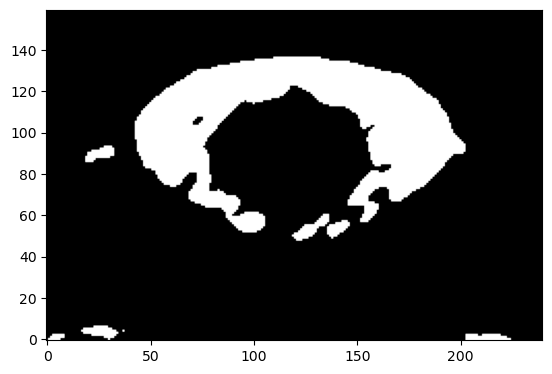

In [47]:
ret, binary = cv.threshold(img_newedsr[:,:,0] ,0, 255,cv.THRESH_BINARY+cv.THRESH_OTSU) # 简单+大津二值化
# Visualization
plt.imshow(binary,cmap='Greys_r',origin='lower')

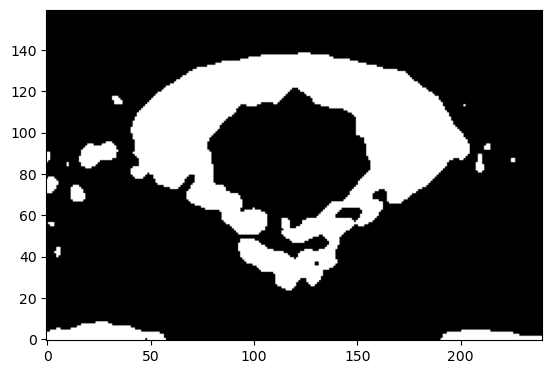

In [50]:
ret, binary = cv.threshold(img_newedsr[:,:,0] ,0, 255, cv.THRESH_BINARY_INV | cv.THRESH_TRIANGLE) # 自适应二值化
contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE) # 查找所有轮廓，每个轮廓信息保存于contours数组中
# Visualization
plt.imshow(binary,cmap='Greys',origin='lower')

In [20]:
import cv2 
from cv2 import dnn_superres


def main():
    img_path = "3.png"
    # 可选择算法，bilinear, bicubic, edsr, fsrcnn
    algorithm = "bilinear"
    # algorithm = "edsr"
    # 放大比例，可输入值2，3，4
    scale = 4
    # 模型路径
    path = "EDSR_x4.pb"

    # 载入图像
    img = cv2.imread(img_path)
    # 如果输入的图像为空
    if img is None:
        print("Couldn't load image: " + str(img_path))
        return

    # 创建模型
    sr = dnn_superres.DnnSuperResImpl_create()

    if algorithm == "bilinear":
        img_new = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
    elif algorithm == "bicubic":
        img_new = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    elif algorithm == "edsr" or algorithm == "fsrcnn":
        # 读取模型
        sr.readModel(path)
        #  设定算法和放大比例
        sr.setModel(algorithm, scale)
        # 放大图像
        img_new = sr.upsample(img)
    else:
        print("Algorithm not recognized")

    # 如果失败
    if img_new is None:
        print("Upsampling failed")

    print("Upsampling succeeded. \n")

    # 展示图片
    cv2.namedWindow("Initial Image", cv2.WINDOW_AUTOSIZE)
    # 初始化图片
    cv2.imshow("Initial Image", img_new)
    cv2.imwrite("./saved.jpg", img_new)
    cv2.waitKey(0)


if __name__ == '__main__':
    main()

Couldn't load image: 3.png


In [ ]:
# import the necessary packages
import argparse
import time
import cv2
import os
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-m", "--model", required=True,help="path to super resolution model")
ap.add_argument("-i", "--image", required=True,help="path to input image we want to increase resolution of")
args = vars(ap.parse_args())


# extract the model name and model scale from the file path
modelName = args["model"].split(os.path.sep)[-1].split("_")[0].lower()
modelScale = args["model"].split("_x")[-1]
modelScale = int(modelScale[:modelScale.find(".")])
# initialize OpenCV's super resolution DNN object, load the super
# resolution model from disk, and set the model name and scale
print("[INFO] loading super resolution model: {}".format(args["model"]))
print("[INFO] model name: {}".format(modelName))
print("[INFO] model scale: {}".format(modelScale))
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(args["model"])
sr.setModel(modelName, modelScale)

# load the input image from disk and display its spatial dimensions
image = cv2.imread(args["image"])
print("[INFO] w: {}, h: {}".format(image.shape[1], image.shape[0]))
# use the super resolution model to upscale the image, timing how
# long it takes
start = time.time()
upscaled = sr.upsample(image)
end = time.time()
print("[INFO] super resolution took {:.6f} seconds".format(end - start))
# show the spatial dimensions of the super resolution image
print("[INFO] w: {}, h: {}".format(upscaled.shape[1],upscaled.shape[0]))

# resize the image using standard bicubic interpolation
start = time.time()
bicubic = cv2.resize(image, (upscaled.shape[1], upscaled.shape[0]),interpolation=cv2.INTER_CUBIC)
end = time.time()
print("[INFO] bicubic interpolation took {:.6f} seconds".format(end - start))

# show the original input image, bicubic interpolation image, and
# super resolution deep learning output
cv2.imshow("Original", image)
cv2.imshow("Bicubic", bicubic)
cv2.imshow("Super Resolution", upscaled)
cv2.waitKey(0)

### 图像去噪

###### 锐化

In [61]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32) #定义一个核
dst2x = cv.filter2D(img_newcl2x, -1, kernel=kernel)
dst4x= cv.filter2D(img_newedsr[:,:,0], -1, kernel=kernel)

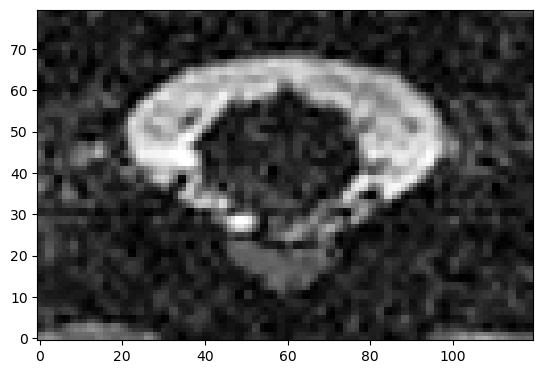

In [62]:
plt.imshow(dst2x,cmap='Greys_r', origin='lower')

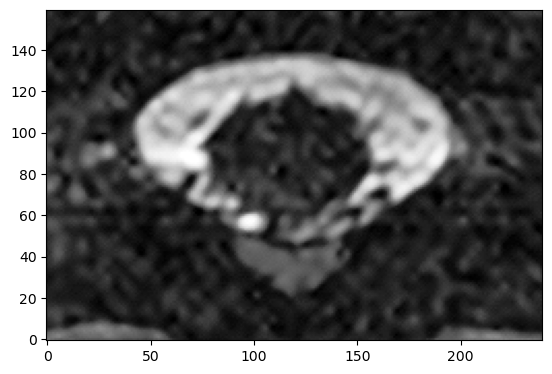

In [63]:
plt.imshow(dst4x,cmap='Greys_r', origin='lower')

###### 去噪

* cv2.fastnlmeansdenosing（）-用于单个灰度图像
cv2.fastNlMeansDenoising(src, h=3, templateWindowSize=7, searchWindowSize=21 )

噪声图像（对于此函数接受2D图像）

templateWindowSize:用于计算权重的模板块的像素大小，需要奇数，建议为7

searchWindowSize :用于计算给定像素加权平均数的窗口的像素大小，需要奇数，建议为21

h:参数调节过滤器强度。较大的 h 值可以完全去除图像中的噪声，但同时也去除了图像中的细节，较小的 h 值可以保留细节，但同时也保留了一些噪声, 默认为3
* cv2.fastnlmeansdenisingcolored（）-用于彩色图像。
* cv2.fastnlmeansdenisingmulti（）-处理短时间内捕获的图像序列（灰度图像）
* cv2.fastnlmeansdenisingcoloredmulti（）-与上面相同，但用于彩色图像。


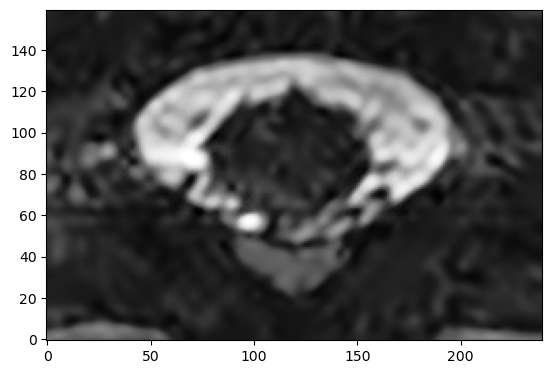

In [72]:
nlmimg = cv2.fastNlMeansDenoising(dst4x,3,7,21)
plt.imshow(nlmimg,cmap='Greys_r', origin='lower')

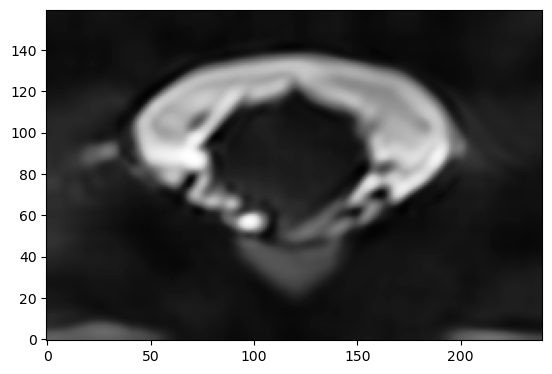

In [74]:
nlmimg = cv2.fastNlMeansDenoising(dst4x,11,21,21)
plt.imshow(nlmimg,cmap='Greys_r', origin='lower')

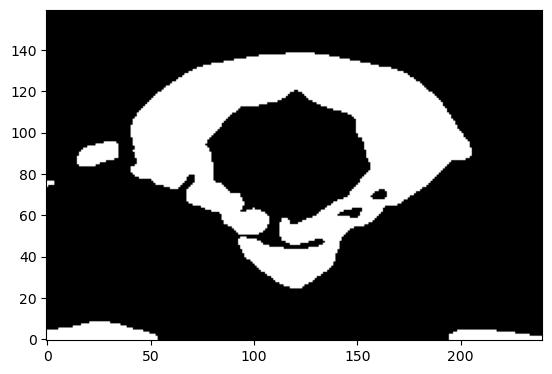

In [81]:
ret, binary = cv.threshold(nlmimg ,0, 255, cv.THRESH_BINARY_INV | cv.THRESH_TRIANGLE) # 自适应二值化
contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE) # 查找所有轮廓，每个轮廓信息保存于contours数组中
# Visualization
plt.imshow(binary,cmap='Greys',origin='lower')

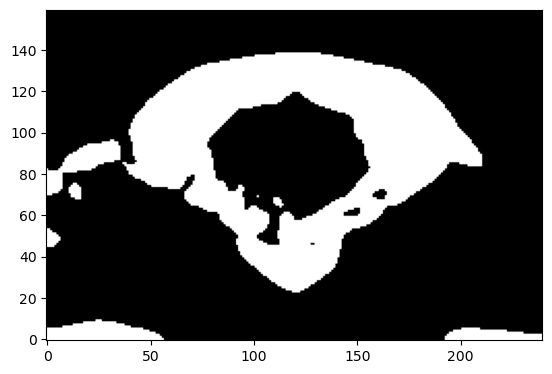

In [88]:
ret, binary = cv.threshold(nlmimg ,48, 255,cv.THRESH_BINARY) # 自适应二值化
contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE) # 查找所有轮廓，每个轮廓信息保存于contours数组中
# Visualization
plt.imshow(binary,cmap='Greys_r',origin='lower')

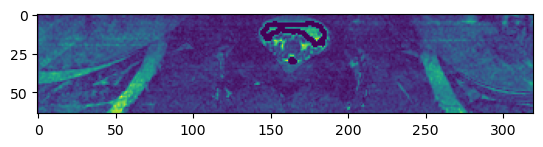

In [119]:
plt.imshow(img220copy)

In [ ]:
for i, c in enumerate(cnts):
    # 计算轮廓区域的图像矩。 在计算机视觉和图像处理中，图像矩通常用于表征图像中对象的形状。
    # 这些力矩捕获了形状的基本统计特性，包括对象的面积，质心（即，对象的中心（x，y）坐标），
    # 方向以及其他所需的特性。
    M = cv.moments(c)
    # m00是图像面积（白色区域）的总和，或者说连通域的面积；而这时m10和m01是图像白色区域上x和y坐标值的累计
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    # 1. 绘制最大内接圆
    r = drawInCircle(thresh_open, img, c, cX, cY)

    # 2. 计算最小外接正矩形的四个顶点，是否绘制外矩形框
    x_min, x_max, y_min, y_max = drawOutRectgle(c, False)

    # 3. 最大内接矩形
    x1, x2, y1, y2 = drawInRectgle(img, c, cX, cY, x_min, x_max, y_min, y_max)
    cv.drawContours(img, [c], -1, (0, 255, 0), 1)       # 最外层轮廓绘制
    cv.circle(img, (cX, cY), 1, (255, 255, 255), -1)    # 轮廓中心点
    cv.putText(img, "center%d=%s avg=%d" % (i, bgr_val, gray_avg), (cX - 90, cY - 16),
                cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

In [ ]:
# (5).下一步是使用轮廓检测找到这些白色区域的位置：返回轮廓个数
        cnts = cv.findContours(thresh_open.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)     # RETR_EXTERNAL
        cnts = imutils.grab_contours(cnts)     # 返回轮廓 contours —— cnts
        # (6).cnts 返回的是所有轮廓，所以需要for循环来遍历每一个轮廓
        for i, c in enumerate(cnts):
            # 计算轮廓区域的图像矩。 在计算机视觉和图像处理中，图像矩通常用于表征图像中对象的形状。
            # 这些力矩捕获了形状的基本统计特性，包括对象的面积，质心（即，对象的中心（x，y）坐标），
            # 方向以及其他所需的特性。
            M = cv.moments(c)
            # m00是图像面积（白色区域）的总和，或者说连通域的面积；而这时m10和m01是图像白色区域上x和y坐标值的累计
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            # 1. 绘制最大内接圆
            r = drawInCircle(thresh_open, img, c, cX, cY)

            # 2. 计算最小外接正矩形的四个顶点，是否绘制外矩形框
            x_min, x_max, y_min, y_max = drawOutRectgle(c, False)

            # 3. 最大内接矩形
            x1, x2, y1, y2 = drawInRectgle(img, c, cX, cY, x_min, x_max, y_min, y_max)
            cv.drawContours(img, [c], -1, (0, 255, 0), 1)       # 最外层轮廓绘制
            cv.circle(img, (cX, cY), 1, (255, 255, 255), -1)    # 轮廓中心点
            cv.putText(img, "center%d=%s avg=%d" % (i, bgr_val, gray_avg), (cX - 90, cY - 16),
                        cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

In [ ]:
def drawInCircle(img_open, img, cont, cX, cY):
            # 绘制最大内接圆 # 最大内接圆——检索轮廓的方式
            c = cont    # 单个轮廓
            contours = cv.findContours(img_open.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
            src = img_open.copy()
            raw_dist = np.empty(src.shape, dtype=np.float32)
            for ii in range(src.shape[0]):
                for jj in range(src.shape[1]):
                    raw_dist[ii, jj] = cv.pointPolygonTest(c, (jj, ii), True)   # 检测点坐标，与c轮廓坐标的距离
            minVal, maxVal, _, maxDistPt = cv.minMaxLoc(raw_dist)   # minMaxLoc查找最小和最大元素值及其位置ma
            maxVal = abs(maxVal)
            cv.circle(img, (cX, cY), np.int(maxVal)-1, (255, 255, 255), 1, cv.LINE_8, 0)    # 最大内接圆
            height = np.int(maxVal)-1
            return np.int(maxVal)-1